In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation,BatchNormalization, Dropout
from tensorflow.keras import Sequential
from keras.optimizers import *
""

import tensorflow as tf
import numpy as np
import pandas as pd
import os
import PIL
import matplotlib.pyplot as plt

import cv2

In [2]:
#load train images
img_size=160
train_dataset = tf.keras.utils.image_dataset_from_directory('C:/Users/User/Documents/UPM/Semester 3/Category/basedata',
                                                            validation_split=0.1,
                                                            batch_size = 32,
                                                            label_mode = 'categorical',
                                                            subset='training',
                                                            seed=123,
                                                            image_size=(img_size,img_size),
                                                            shuffle=True
                                                           )





Found 426 files belonging to 6 classes.
Using 384 files for training.


In [3]:
#load test images
img_size=160
test_dataset = tf.keras.utils.image_dataset_from_directory('C:/Users/User/Desktop/Category/basedata/',
                                                           validation_split=0.1,
                                                           batch_size = 32,
                                                           label_mode = 'categorical',
                                                           subset='validation',
                                                           seed=123,
                                                           image_size=(img_size,img_size),
                                                           shuffle=True
                                                          )

Found 426 files belonging to 6 classes.
Using 42 files for validation.


In [4]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [5]:
img_size=160
model = tf.keras.models.Sequential()

# Input layer
# Can be omitted, you can specify the input_shape in other layers
model.add(tf.keras.layers.InputLayer(input_shape=(img_size,img_size,3)))

# 1st 2D Convolution layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(11,11), activation='relu'))
# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
model.add(tf.keras.layers.MaxPool2D())
# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(tf.keras.layers.BatchNormalization())


# 2nd 2D Convolution layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(11,11),activation='relu'))
# Max Pool layer 
model.add(tf.keras.layers.MaxPool2D())
# Normalization layer
model.add(tf.keras.layers.BatchNormalization())

# 1st fully convolutional layer 
model.add(tf.keras.layers.Conv2D(256, kernel_size=(11,11),activation='relu'))
# Max Pool layer 
model.add(tf.keras.layers.MaxPool2D())
# Normalization layer
model.add(tf.keras.layers.BatchNormalization())
# Global Max Pool layer
model.add(tf.keras.layers.GlobalMaxPool2D())


# Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))

# Normalization layer
model.add(tf.keras.layers.BatchNormalization())

#Add Output Layer
model.add(tf.keras.layers.Dense(6, activation='softmax')) # = 12 predicted classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      23296     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 128)       991360    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                        

In [6]:
#from tensorflow.keras.callbacks import EarlyStopping

#custom_early_stopping = EarlyStopping(
#    monitor='val_accuracy', 
#    patience=20, 
#    min_delta=0.001, 
#    mode='max'
#)

In [7]:
epochs =270

history = model.fit(
    train_dataset, 
    epochs=epochs,
    validation_data=test_dataset
)

Epoch 1/270
12/12 [==============================] - 14s 598ms/step - loss: 1.5096 - accuracy: 0.4167 - val_loss: 773.7886 - val_accuracy: 0.1667
Epoch 2/270
12/12 [==============================] - 2s 189ms/step - loss: 0.8339 - accuracy: 0.6849 - val_loss: 503.7129 - val_accuracy: 0.1667
Epoch 3/270
12/12 [==============================] - 2s 190ms/step - loss: 0.6122 - accuracy: 0.7552 - val_loss: 298.4139 - val_accuracy: 0.1667
Epoch 4/270
12/12 [==============================] - 2s 190ms/step - loss: 0.5316 - accuracy: 0.7995 - val_loss: 200.2665 - val_accuracy: 0.1667
Epoch 5/270
12/12 [==============================] - 2s 190ms/step - loss: 0.4201 - accuracy: 0.8281 - val_loss: 123.7760 - val_accuracy: 0.1667
Epoch 6/270
12/12 [==============================] - 2s 189ms/step - loss: 0.3367 - accuracy: 0.8698 - val_loss: 84.3863 - val_accuracy: 0.1667
Epoch 7/270
12/12 [==============================] - 2s 189ms/step - loss: 0.3056 - accuracy: 0.8932 - val_loss: 72.8834 - val_acc

Epoch 58/270
12/12 [==============================] - 2s 190ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.9310 - val_accuracy: 0.7857
Epoch 59/270
12/12 [==============================] - 2s 189ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.9376 - val_accuracy: 0.7857
Epoch 60/270
12/12 [==============================] - 2s 190ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9363 - val_accuracy: 0.7857
Epoch 61/270
12/12 [==============================] - 2s 189ms/step - loss: 7.0695e-04 - accuracy: 1.0000 - val_loss: 0.9456 - val_accuracy: 0.7857
Epoch 62/270
12/12 [==============================] - 2s 190ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9230 - val_accuracy: 0.7857
Epoch 63/270
12/12 [==============================] - 2s 189ms/step - loss: 5.8905e-04 - accuracy: 1.0000 - val_loss: 0.9182 - val_accuracy: 0.7857
Epoch 64/270
12/12 [==============================] - 2s 189ms/step - loss: 7.8479e-04 - accuracy: 1.0000 - val_loss: 0.9206 - v

12/12 [==============================] - 2s 189ms/step - loss: 1.1999e-04 - accuracy: 1.0000 - val_loss: 1.0373 - val_accuracy: 0.7857
Epoch 169/270
12/12 [==============================] - 2s 190ms/step - loss: 1.2132e-04 - accuracy: 1.0000 - val_loss: 1.0185 - val_accuracy: 0.7857
Epoch 170/270
12/12 [==============================] - 2s 190ms/step - loss: 1.3020e-04 - accuracy: 1.0000 - val_loss: 1.0086 - val_accuracy: 0.7857
Epoch 171/270
12/12 [==============================] - 2s 191ms/step - loss: 2.6693e-04 - accuracy: 1.0000 - val_loss: 1.0844 - val_accuracy: 0.7619
Epoch 172/270
12/12 [==============================] - 2s 190ms/step - loss: 1.5534e-04 - accuracy: 1.0000 - val_loss: 1.1041 - val_accuracy: 0.7857
Epoch 173/270
12/12 [==============================] - 2s 190ms/step - loss: 4.2286e-04 - accuracy: 1.0000 - val_loss: 1.0988 - val_accuracy: 0.7857
Epoch 174/270
12/12 [==============================] - 2s 190ms/step - loss: 1.5622e-04 - accuracy: 1.0000 - val_loss: 1

12/12 [==============================] - 2s 190ms/step - loss: 5.2455e-05 - accuracy: 1.0000 - val_loss: 1.0798 - val_accuracy: 0.8095
Epoch 224/270
12/12 [==============================] - 2s 189ms/step - loss: 6.6894e-05 - accuracy: 1.0000 - val_loss: 1.0688 - val_accuracy: 0.8095
Epoch 225/270
12/12 [==============================] - 2s 189ms/step - loss: 8.0252e-05 - accuracy: 1.0000 - val_loss: 1.0832 - val_accuracy: 0.8095
Epoch 226/270
12/12 [==============================] - 2s 189ms/step - loss: 8.0970e-05 - accuracy: 1.0000 - val_loss: 1.1152 - val_accuracy: 0.7857
Epoch 227/270
12/12 [==============================] - 2s 189ms/step - loss: 1.5035e-04 - accuracy: 1.0000 - val_loss: 1.0685 - val_accuracy: 0.8095
Epoch 228/270
12/12 [==============================] - 2s 189ms/step - loss: 5.7025e-05 - accuracy: 1.0000 - val_loss: 1.0601 - val_accuracy: 0.8095
Epoch 229/270
12/12 [==============================] - 2s 189ms/step - loss: 6.8696e-05 - accuracy: 1.0000 - val_loss: 1

In [8]:
#Compile model
model.compile(
  optimizer='adam',
  loss='mse',
  metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [9]:
evaluation = model.evaluate(test_dataset)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

2/2 [==============================] - 0s 23ms/step - loss: 0.0589 - categorical_accuracy: 0.8095
Test Accuracy: 80.95%


In [10]:
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)

2/2 - 0s - loss: 0.0589 - categorical_accuracy: 0.8095 - 110ms/epoch - 55ms/step


In [11]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)

2/2 - 0s - loss: 1.0815 - accuracy: 0.8095 - 367ms/epoch - 183ms/step


In [13]:
evaluation = model.evaluate(train_dataset)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

12/12 [==============================] - 1s 41ms/step - loss: 1.0026e-05 - accuracy: 1.0000
Train Accuracy: 100.00%


In [14]:
class_names = test_dataset.class_names
print(class_names)

['A Not Ripe', 'A Ripe', 'B Not Ripe', 'B Ripe', 'C Not Ripe', 'C Ripe']


In [15]:
#1 A Ripe
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR10_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [16]:
#2
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR11_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.11 percent confidence.


In [17]:
#3
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR12_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [18]:
#4
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR13_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Not Ripe with a 34.09 percent confidence.


In [19]:
#5
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR14_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [20]:
#6
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR15_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [21]:
#7
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR16_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [22]:
#8
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR1_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160,160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 28.74 percent confidence.


In [23]:
#9
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR2_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160,160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [24]:
#10
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR3_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160,160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [25]:
#11
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR4_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160,160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 34.99 percent confidence.


In [26]:
#12
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR5_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.21 percent confidence.


In [27]:
#13
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR6_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.21 percent confidence.


In [28]:
#14
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR77_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 24.16 percent confidence.


In [29]:
#15
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR78_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 34.30 percent confidence.


In [30]:
#17
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR7_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [31]:
#17
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR7_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [32]:
#18
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR8_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [33]:
#19
rootdir = "C:/Users/User/Desktop/Category/test/A Ripe/AR9_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to A Ripe with a 35.22 percent confidence.


In [34]:
#1 A Not Ripe

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR10_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)



This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [35]:
#2

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR11_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [36]:
#3

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR12_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [37]:
#4

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR13_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160,160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.12 percent confidence.


In [38]:
#5

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR14_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160,160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [39]:
#6

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR15_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [40]:
#7

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR16_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [41]:
#8

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR1_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [42]:
#9

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR2_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [43]:
#10

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR3_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [44]:
#11

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR4_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [45]:
#12

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR5_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.20 percent confidence.


In [46]:
#13

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR6_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [47]:
#14

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR79_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.21 percent confidence.


In [48]:
#15

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR7_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [49]:
#16

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR80_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [50]:
#17

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR81_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [51]:
#18

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR8_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [52]:
#19

rootdir = "C:/Users/User/Desktop/Category/test/A Not Ripe/ANR9_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 35.22 percent confidence.


In [53]:
#1 B Ripe

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR10_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Ripe with a 34.48 percent confidence.


In [54]:
#2

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR11_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 26.24 percent confidence.


In [55]:
#3

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR12_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 34.87 percent confidence.


In [56]:
#4

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR13_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Ripe with a 33.42 percent confidence.


In [57]:
#5

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR14_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 33.97 percent confidence.


In [58]:
#6

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR15_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 33.85 percent confidence.


In [59]:
#7

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR16_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 34.66 percent confidence.


In [60]:
#8

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR1_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 34.81 percent confidence.


In [61]:
#9

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR2_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 20.79 percent confidence.


In [62]:
#10

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR3_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 24.84 percent confidence.


In [63]:
#11

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR4_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 34.28 percent confidence.


In [64]:
#12

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR5_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 33.27 percent confidence.


In [65]:
#13

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR65_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 35.22 percent confidence.


In [66]:
#14

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR66_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Ripe with a 31.98 percent confidence.


In [67]:
#15

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR67_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 35.11 percent confidence.


In [68]:
#16

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR6_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 28.95 percent confidence.


In [69]:
#17

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR7_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Ripe with a 20.52 percent confidence.


In [70]:
#18

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR8_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Not Ripe with a 26.50 percent confidence.


In [71]:
#19

rootdir = "C:/Users/User/Desktop/Category/test/B Ripe/BR9_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to A Ripe with a 33.68 percent confidence.


In [72]:
#1 B Not Ripe

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR10_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Not Ripe with a 35.22 percent confidence.


In [73]:
#2

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR11_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Not Ripe with a 26.10 percent confidence.


In [74]:
#3

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR12_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 26.29 percent confidence.


In [75]:
#4

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR13_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 34.41 percent confidence.


In [76]:
#5

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR14_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Not Ripe with a 35.22 percent confidence.


In [77]:
#6

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR15_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Not Ripe with a 24.66 percent confidence.


In [78]:
#7

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR16_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 34.07 percent confidence.


In [79]:
#8

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR1_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Not Ripe with a 35.22 percent confidence.


In [80]:
#9

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR2_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Not Ripe with a 35.22 percent confidence.


In [81]:
#10

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR3_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 23.68 percent confidence.


In [82]:
#11

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR4_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Not Ripe with a 35.22 percent confidence.


In [83]:
#12

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR5_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Ripe with a 31.65 percent confidence.


In [84]:
#13

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR69_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 27.98 percent confidence.


In [85]:
#14

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR6_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.20 percent confidence.


In [86]:
#15

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR70_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 28.56 percent confidence.


In [87]:
#16

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR71_270.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Not Ripe with a 35.20 percent confidence.


In [88]:
#17

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR7_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Not Ripe with a 35.22 percent confidence.


In [89]:
#18

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR8_180.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to B Not Ripe with a 27.31 percent confidence.


In [90]:
#19

rootdir = "C:/Users/User/Desktop/Category/test/B Not Ripe/BNR9_90.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 34.82 percent confidence.


In [91]:
#1 C Ripe

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR11_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [92]:
#2

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR13_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.16 percent confidence.


In [93]:
#3

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR22_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [94]:
#4

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR24_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [95]:
#5

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR30_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [96]:
#6

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR32_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [97]:
#7

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR38_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [98]:
#8

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR44_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [99]:
#9

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR45_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [100]:
#10

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR46_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [101]:
#11

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR47_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [102]:
#12

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR4_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [103]:
#13

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR50_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [104]:
#14

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR51_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [105]:
#15

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR60_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [106]:
#16

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR62_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [107]:
#17

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR63_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [108]:
#18

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR64_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [109]:
#19

rootdir = "C:/Users/User/Desktop/Category/test/C Ripe/CR8_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [110]:
#1 C Not Ripe

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR10_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [111]:
#2

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR11_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [112]:
#3

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR1_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [113]:
#4

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR20_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [114]:
#5

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR22_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [115]:
#6

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR28_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [116]:
#7

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR30_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [117]:
#8

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR38_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [118]:
#9

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR43_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 34.97 percent confidence.


In [119]:
#10

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR52_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [120]:
#11

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR57_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [121]:
#12

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR58_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [122]:
#13

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR59_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [123]:
#14

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR5_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [124]:
#15

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR62_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [125]:
#16

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR63_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [126]:
#17

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR64_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Not Ripe with a 35.22 percent confidence.


In [127]:
#18

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR6_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 35.22 percent confidence.


In [128]:
#19

rootdir = "C:/Users/User/Desktop/Category/test/C Not Ripe/CNR9_0.png"
img = tf.keras.utils.load_img(
    rootdir, target_size=(160, 160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to C Ripe with a 34.42 percent confidence.


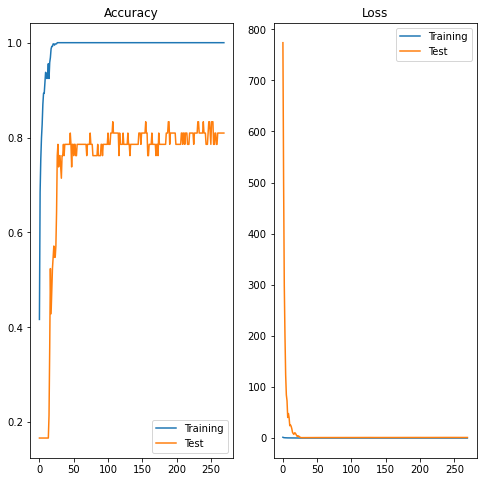

In [129]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Test')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Test')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()